In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [3]:
dataset = pd.read_csv('abalone.csv')
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].T

x = pd.get_dummies(x, drop_first=False, prefix_sep='_')       #one hot encoding
x = (x - np.min(x)) / (np.max(x) - np.min(x))       #normalizing the data
x.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0


In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

x_train  = np.c_[np.ones(len(x_train)),x_train]
x_test  = np.c_[np.ones(len(x_test)),x_test]

In [6]:
iter = 20000
theta = np.zeros(x_train.shape[1]).T  
alpha = 0.1
n = len(x_train)

In [7]:
cost = np.empty(iter)        #gradient descent vectorized implementation
for i in range(iter):
    y_pred = x_train.dot(theta)
    cost[i] = (1 / (2 * n)) * np.transpose((x_train @ theta - y_train)) @ (x_train @ theta - y_train)
    theta = theta - (alpha / n) * (x_train.T.dot(x_train @ theta - y_train)) 
    y_pred =  x_train.dot(theta)

# Plot for rmse vs no. of iterations on training data

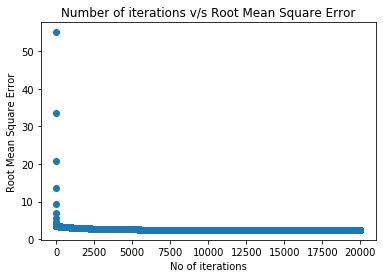

In [8]:
plt.plot(np.arange(0,iter),cost,'o')
plt.xlabel("No of iterations")
plt.ylabel("Root Mean Square Error")
plt.title("Number of iterations v/s Root Mean Square Error")
plt.show()

# Plot for rmse vs no. of iterations on testing data

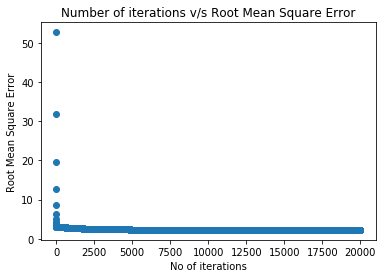

In [9]:
iter = 20000
theta = np.zeros(x_test.shape[1]).T  
alpha = 0.1
n = len(x_test)

cost = np.empty(iter)        #gradient descent vectorized implementation
for i in range(iter):
    y_pred = x_test.dot(theta)
    cost[i] = (1 / (2 * n)) * np.transpose((x_test @ theta - y_test)) @ (x_test @ theta - y_test)
    theta = theta - (alpha / n) * (x_test.T.dot(x_test @ theta - y_test)) 
    y_pred =  x_test.dot(theta)
    
n = len(x_test)
h_theta = x_test.dot(theta)
rmse_final = np.sqrt((np.sum(y_test - h_theta) ** 2) / n)
    
plt.plot(np.arange(0,iter),cost,'o')
plt.xlabel("No of iterations")
plt.ylabel("Root Mean Square Error")
plt.title("Number of iterations v/s Root Mean Square Error")
plt.show()

# Using Normal Equation(Closed Form)

In [10]:
#for training data

theta = ((np.linalg.pinv(x_train.T.dot(x_train)).dot(x_train.T)).dot(y_train))
h_theta = x_train.dot(theta) 
rmse = np.sqrt((np.sum(y_train - h_theta) ** 2) / n)
print('The RMSE value for training data is:' ,rmse)

#for testing data
theta = ((np.linalg.pinv(x_test.T.dot(x_test)).dot(x_test.T)).dot(y_test))
h_theta = x_test.dot(theta) 
rmse = np.sqrt((np.sum(y_test - h_theta) ** 2) / n)
print('The RMSE value for training data is:' ,rmse)


The RMSE value for training data is: 2.457217691257398e-11
The RMSE value for training data is: 2.191787065362097e-11


# Comparison between RMSE's obtained in the above two cases 

In [11]:
print('The RMSE value using gradient descent is:' ,rmse_final)
print('The RMSE value using normal equation(closed form) is:' ,rmse)
print('\n Observations made are: \n 1.The normal equation proves better in cases where the dimensionality is low as it computationally expensive. \n 2.The RMSE value in case of normal equation is very less as compared to gradient descent.')

The RMSE value using gradient descent is: 0.0017603549861880828
The RMSE value using normal equation(closed form) is: 2.191787065362097e-11

 Observations made are: 
 1.The normal equation proves better in cases where the dimensionality is low as it computationally expensive. 
 2.The RMSE value in case of normal equation is very less as compared to gradient descent.
